In [1]:
import pandas as pd
import numpy as np

%pylab inline
%load_ext sql

Populating the interactive namespace from numpy and matplotlib


/Users/penglish/.virtualenvs/data/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/penglish/.virtualenvs/data/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
%sql [pg_local_march_madness]

'Connected: penglish@march_madness_2016'

# SELECT ... FROM

In [6]:
%%sql
SELECT * FROM "RegularSeasonDetailedResults" LIMIT 10

10 rows affected.


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
5,2003,11,1458,81,1186,55,H,0,26,57,...,11,12,17,6,22,8,19,4,3,25
6,2003,12,1161,80,1236,62,H,0,23,55,...,15,20,28,9,21,11,30,10,4,28
7,2003,12,1186,75,1457,61,N,0,28,62,...,17,17,23,8,25,10,15,14,8,18
8,2003,12,1194,71,1156,66,N,0,28,58,...,18,12,27,13,26,13,25,8,2,18
9,2003,12,1458,84,1296,56,H,0,32,67,...,14,7,12,9,23,10,18,1,3,18


In [7]:
%%sql
SELECT 
    "Season", 
    "Wteam", 
    "Lteam", 
    "Wscore", 
    "Lscore"

FROM "RegularSeasonDetailedResults" 

LIMIT 10

10 rows affected.


,Season,Wteam,Lteam,Wscore,Lscore
0,2003,1104,1328,68,62
1,2003,1272,1393,70,63
2,2003,1266,1437,73,61
3,2003,1296,1457,56,50
4,2003,1400,1208,77,71
5,2003,1458,1186,81,55
6,2003,1161,1236,80,62
7,2003,1186,1457,75,61
8,2003,1194,1156,71,66
9,2003,1458,1296,84,56


In [10]:
%%sql
SELECT 
    "Season", 
    "Wteam", 
    "Lteam", 
    "Wscore", 
    "Lscore",
    "Wscore" - "Lscore" AS "PointDifference"

FROM "RegularSeasonDetailedResults" 

LIMIT 10

10 rows affected.


,Season,Wteam,Lteam,Wscore,Lscore,PointDifference
0,2003,1104,1328,68,62,6
1,2003,1272,1393,70,63,7
2,2003,1266,1437,73,61,12
3,2003,1296,1457,56,50,6
4,2003,1400,1208,77,71,6
5,2003,1458,1186,81,55,26
6,2003,1161,1236,80,62,18
7,2003,1186,1457,75,61,14
8,2003,1194,1156,71,66,5
9,2003,1458,1296,84,56,28


# WHERE

In [12]:
%%sql
SELECT 
    "Season", 
    "Wteam", 
    "Lteam", 
    "Wscore", 
    "Lscore",
    "Wscore" - "Lscore" AS "PointDifference"
    
FROM "RegularSeasonDetailedResults" 

WHERE 
    "Season" = 2015
    AND "Wscore" > 70
    AND "Lscore" < 30

LIMIT 10

3 rows affected.


,Season,Wteam,Lteam,Wscore,Lscore,PointDifference
0,2015,1257,1366,87,26,61
1,2015,1438,1217,76,27,49
2,2015,1246,1286,86,28,58


In [14]:
%%sql
SELECT 
    "Season", 
    "Wteam", 
    "Lteam", 
    "Wscore", 
    "Lscore",
    "Wscore" - "Lscore" AS "PointDifference"

FROM "RegularSeasonDetailedResults" 

WHERE 
    "Season" = 2015
    AND ("Wscore" - "Lscore") > 40

-- LIMIT 10

66 rows affected.


,Season,Wteam,Lteam,Wscore,Lscore,PointDifference
0,2015,1124,1270,80,39,41
1,2015,1155,1197,86,41,45
2,2015,1181,1342,113,44,69
3,2015,1203,1212,92,40,52
4,2015,1211,1170,104,58,46
5,2015,1231,1290,116,65,51
6,2015,1323,1127,82,39,43
7,2015,1332,1164,107,65,42
8,2015,1393,1244,89,42,47
9,2015,1401,1322,109,68,41


In [15]:
%%sql
SELECT 
    "Season", 
    "Wteam", 
    "Lteam", 
    "Wscore", 
    "Lscore",
    "Wscore" - "Lscore" AS "PointDifference"
FROM "RegularSeasonDetailedResults" 

WHERE 
    "Season" = 2015
    AND "PointDifference" > 40

LIMIT 10

(psycopg2.ProgrammingError) column "PointDifference" does not exist
LINE 12:     AND "PointDifference" > 40
                 ^
 [SQL: 'SELECT \n    "Season", \n    "Wteam", \n    "Lteam", \n    "Wscore", \n    "Lscore",\n    "Wscore" - "Lscore" AS "PointDifference"\nFROM "RegularSeasonDetailedResults" \n\nWHERE \n    "Season" = 2015\n    AND "PointDifference" > 40\n\nLIMIT 10']


## Aggregate Functions

In [19]:
%%sql

SELECT
    COUNT(*)
FROM "TourneyDetailedResults"

1 rows affected.


,count
0,847


In [18]:
%%sql

SELECT
    COUNT(*)
FROM "TourneyDetailedResults"
WHERE "Season" = 2015

1 rows affected.


,count
0,67


In [26]:
%%sql
SELECT 
    AVG("Wscore")
    , STDDEV("Wscore")
    , MIN("Wscore")
    , MAX("Wscore")
    , AVG("Wscore" - "Lscore") AS avg_point_diff
    
FROM "TourneyDetailedResults"
WHERE "Season" = 2015

1 rows affected.


,avg,stddev,min,max,avg_point_diff
0,72.9253731343283582,9.8169819358272331,56,94,10.2985074626865672


In [27]:
%%sql
SELECT 
    AVG("Wfga") AS avg_wfga
    , AVG("Wfgm") AS avg_wfgm
    
    , AVG("Lfga") AS avg_lfga
    , AVG("Lfgm") AS avg_lfgm
    
    , AVG("Wfgm"^2 / ("Wfgm"^2 + "Wfga"^2)) AS winning_pythag_expectation
    , AVG("Lfgm"^2 / ("Lfgm"^2 + "Lfga"^2)) AS losing_pythag_expectation

FROM "TourneyDetailedResults"
WHERE "Season" = 2015

1 rows affected.


,avg_wfga,avg_wfgm,avg_lfga,avg_lfgm,winning_pythag_expectation,losing_pythag_expectation
0,53.3283582089552239,25.2537313432835821,56.9552238805970149,22.6865671641791045,0.185947,0.140243


In [30]:
%%sql
SELECT 
    "Season"
    , AVG("Wscore")
    
FROM "TourneyDetailedResults"
WHERE "Season" = 2015

(psycopg2.ProgrammingError) column "TourneyDetailedResults.Season" must appear in the GROUP BY clause or be used in an aggregate function
LINE 2:     "Season"
            ^
 [SQL: 'SELECT \n    "Season"\n    , AVG("Wscore")\n    \nFROM "TourneyDetailedResults"\nWHERE "Season" = 2015']


# GROUP BY

In [31]:
%%sql
SELECT 
    "Season"
    , AVG("Wscore") AS avg_wscore
    , AVG("Lscore") AS avg_lscore

FROM "RegularSeasonCompactResults"

GROUP BY "Season"

ORDER BY "Season"

31 rows affected.


,Season,avg_wscore,avg_lscore
0,1985,74.7230398715547230,63.8603157613058603
1,1986,74.8136399682791435,63.6338884483214380
2,1987,77.9938697318007663,66.7706257982120051
3,1988,79.7737041719342604,67.6970922882427307
4,1989,81.7285112707456032,69.5308397324746099
5,1990,80.8464771322620519,68.8336217552533993
6,1991,82.7339316032015523,70.0572398738782440
7,1992,79.9920038769081657,67.1446571359340926
8,1993,79.5087895529884480,67.3018583626318433
9,1994,81.1603448275862069,68.5613300492610837


In [32]:
df = _

In [33]:
df = df.astype(np.float64)

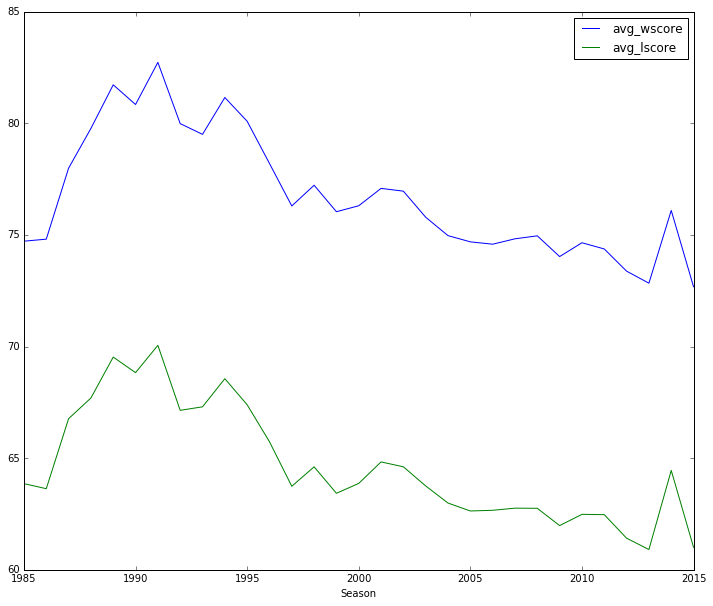

In [34]:
df.plot(x="Season", y=["avg_wscore", "avg_lscore"])

In [35]:
%%sql
SELECT 
    "Season"
    , AVG("Wfga") AS avg_wfga
    , AVG("Wfgm") AS avg_wfgm
    
    , AVG("Lfga") AS avg_lfga
    , AVG("Lfgm") AS avg_lfgm
    
    , AVG("Wfgm"^2 / ("Wfgm"^2 + "Wfga"^2)) AS winning_pythag_expectation
    , AVG("Lfgm"^2 / ("Lfgm"^2 + "Lfga"^2)) AS losing_pythag_expectation

FROM "TourneyDetailedResults"

GROUP BY "Season"
ORDER BY "Season"

13 rows affected.


,Season,avg_wfga,avg_wfgm,avg_lfga,avg_lfgm,winning_pythag_expectation,losing_pythag_expectation
0,2003,57.9062500000000000,27.7031250000000000,58.9062500000000000,23.3750000000000000,0.188022,0.137660
1,2004,54.5312500000000000,25.8906250000000000,58.4687500000000000,23.1406250000000000,0.185531,0.138106
2,2005,54.6093750000000000,26.2812500000000000,58.5468750000000000,23.5312500000000000,0.189900,0.141099
3,2006,54.0937500000000000,24.9843750000000000,57.2343750000000000,22.9843750000000000,0.177187,0.141864
4,2007,54.2500000000000000,25.5156250000000000,57.3906250000000000,22.9375000000000000,0.181932,0.138246
5,2008,55.4531250000000000,27.5000000000000000,57.3906250000000000,22.3750000000000000,0.198234,0.134780
6,2009,57.0000000000000000,27.0625000000000000,59.3281250000000000,23.2968750000000000,0.185505,0.137896
7,2010,55.2187500000000000,25.5156250000000000,57.4843750000000000,22.6875000000000000,0.176190,0.137222
8,2011,54.7164179104477612,25.5373134328358209,56.5671641791044776,22.3134328358208955,0.179827,0.137186
9,2012,53.9104477611940299,25.1940298507462687,57.1940298507462687,22.2537313432835821,0.181415,0.133997


In [36]:
%%sql
SELECT 
    "Wteam"
    , "Season"
    
    , AVG("Wscore")
    , COUNT(*)
    
FROM "TourneyDetailedResults"

GROUP BY "Season", "Wteam"

ORDER BY AVG("Wscore") DESC

LIMIT 10

10 rows affected.


,Wteam,Season,avg,count
0,1140,2010,99.0000000000000000,1
1,1397,2007,99.0000000000000000,2
2,1325,2010,97.0000000000000000,1
3,1246,2004,96.0000000000000000,1
4,1279,2015,94.0000000000000000,1
5,1112,2006,94.0000000000000000,1
6,1314,2008,93.0000000000000000,4
7,1280,2005,93.0000000000000000,1
8,1437,2015,93.0000000000000000,1
9,1449,2005,92.5000000000000000,2


# JOIN

## What are all these 4 digit numbers? (Implicit Left Join) 

In [39]:
%%sql
SELECT 
    rsdr."Season"
    , rsdr."Wteam" 
    , winning_team."Team_Name" AS winning_team_name
    , rsdr."Lteam" 
    , losing_team."Team_Name" AS losing_team_name

FROM "RegularSeasonDetailedResults" AS rsdr

JOIN "Teams" AS winning_team 
    ON winning_team."Team_Id" = rsdr."Wteam"
JOIN "Teams" AS losing_team 
    ON losing_team."Team_Id"= rsdr."Lteam"

WHERE 
    "Season" = 2015
    AND ("Wscore" - "Lscore") > 50


16 rows affected.


,Season,Wteam,winning_team_name,Lteam,losing_team_name
0,2015,1181,Duke,1342,Presbyterian
1,2015,1203,G Washington,1212,Grambling
2,2015,1231,Indiana,1290,MS Valley St
3,2015,1228,Illinois,1164,Coppin St
4,2015,1211,Gonzaga,1386,St Joseph's PA
5,2015,1345,Purdue,1212,Grambling
6,2015,1246,Kentucky,1286,Montana St
7,2015,1326,Ohio St,1357,Sacred Heart
8,2015,1257,Louisville,1366,Savannah St
9,2015,1395,TCU,1290,MS Valley St


## Explicit Left Join (Same thing)

In [40]:
%%sql
SELECT 
    rsdr."Season"
    , rsdr."Wteam" 
    , winning_team."Team_Name" AS winning_team_name
    , rsdr."Lteam" 
    , losing_team."Team_Name" AS losing_team_name
FROM "RegularSeasonDetailedResults" AS rsdr

LEFT JOIN "Teams" AS winning_team ON winning_team."Team_Id" = rsdr."Wteam"
LEFT JOIN "Teams" AS losing_team ON losing_team."Team_Id"= rsdr."Lteam"

WHERE 
    "Season" = 2015
    AND ("Wscore" - "Lscore") > 50

16 rows affected.


,Season,Wteam,winning_team_name,Lteam,losing_team_name
0,2015,1181,Duke,1342,Presbyterian
1,2015,1203,G Washington,1212,Grambling
2,2015,1231,Indiana,1290,MS Valley St
3,2015,1228,Illinois,1164,Coppin St
4,2015,1211,Gonzaga,1386,St Joseph's PA
5,2015,1345,Purdue,1212,Grambling
6,2015,1246,Kentucky,1286,Montana St
7,2015,1326,Ohio St,1357,Sacred Heart
8,2015,1257,Louisville,1366,Savannah St
9,2015,1395,TCU,1290,MS Valley St


## What are all the possible matchups? (Cross Join, Cartesian Product)

In [42]:
%%sql
WITH 
t AS (SELECT "Team_Id" AS team FROM "Teams")

SELECT 
    t1.team AS team1
    , t2.team AS team2

FROM t AS t1 CROSS JOIN t AS t2

WHERE t1.team <> t2.team

LIMIT 10

10 rows affected.


,team1,team2
0,1101,1102
1,1101,1103
2,1101,1104
3,1101,1105
4,1101,1106
5,1101,1107
6,1101,1108
7,1101,1109
8,1101,1110
9,1101,1111


## How many matchups are possible?

In [47]:
%%sql
WITH 
t AS (SELECT "Team_Id" AS team FROM "Teams")

SELECT 
    COUNT(*)
FROM t AS t1, t AS t2

WHERE t1.team <> t2.team


1 rows affected.


,count
0,132132


## Matchups with team names

In [51]:
%%sql
WITH 
t AS (SELECT "Team_Id" AS team FROM "Teams")

SELECT 
    t1.team AS team1
    , t2.team AS team2

    , (SELECT "Team_Name" FROM "Teams" WHERE "Teams"."Team_Id" = t1.team) AS t1_name    
    , (SELECT "Team_Name" FROM "Teams" WHERE "Teams"."Team_Id" = t2.team) AS t2_name
    
    , t1_names."Team_Name"

FROM t AS t1 CROSS JOIN t AS t2

WHERE t1.team <> t2.team

LIMIT 10

10 rows affected.


,team1,team2,t1_name,t2_name,Team_Name
0,1101,1102,Abilene Chr,Air Force,Abilene Chr
1,1101,1103,Abilene Chr,Akron,Abilene Chr
2,1101,1104,Abilene Chr,Alabama,Abilene Chr
3,1101,1105,Abilene Chr,Alabama A&M,Abilene Chr
4,1101,1106,Abilene Chr,Alabama St,Abilene Chr
5,1101,1107,Abilene Chr,Albany NY,Abilene Chr
6,1101,1108,Abilene Chr,Alcorn St,Abilene Chr
7,1101,1109,Abilene Chr,Alliant Intl,Abilene Chr
8,1101,1110,Abilene Chr,American Univ,Abilene Chr
9,1101,1111,Abilene Chr,Appalachian St,Abilene Chr


## Avoid Mixing Implicit and Explicit Joins

In [52]:
%%sql
WITH 
t AS (SELECT "Team_Id" AS team FROM "Teams")
, tdr AS (
    SELECT 
        "Wteam" AS wteam
        , "Lteam" AS lteam
        , "Wscore" - "Lscore" AS point_difference
    FROM "TourneyDetailedResults"
)

SELECT 
    t1.team AS team1
    , t2.team AS team2

FROM t AS t1, t AS t2

JOIN tdr ON tdr.wteam = t1.team

LIMIT 10

(psycopg2.ProgrammingError) invalid reference to FROM-clause entry for table "t1"
LINE 17: JOIN tdr ON tdr.wteam = t1.team
                                 ^
HINT:  There is an entry for table "t1", but it cannot be referenced from this part of the query.
 [SQL: 'WITH \nt AS (SELECT "Team_Id" AS team FROM "Teams")\n, tdr AS (\n    SELECT \n        "Wteam" AS wteam\n        , "Lteam" AS lteam\n        , "Wscore" - "Lscore" AS point_difference\n    FROM "TourneyDetailedResults"\n)\n\nSELECT \n    t1.team AS team1\n    , t2.team AS team2\n\nFROM t AS t1, t AS t2\n\nJOIN tdr ON tdr.wteam = t1.team\n\nLIMIT 10']


In [53]:
%%sql
WITH 
t AS (SELECT "Team_Id" AS team FROM "Teams")
, tdr AS (
    SELECT 
        "Wteam" AS wteam
        , "Lteam" AS lteam
        , "Wscore" - "Lscore" AS point_difference
    FROM "TourneyDetailedResults"
)

SELECT 
    t1.team AS team1
    , t2.team AS team2
    , tdr.point_difference AS t1_point_difference

FROM t AS t1 
CROSS JOIN t AS t2
JOIN tdr ON tdr.wteam = t1.team

LIMIT 10

10 rows affected.


,team1,team2,t1_point_difference
0,1104,1101,1
1,1104,1102,1
2,1104,1103,1
3,1104,1104,1
4,1104,1105,1
5,1104,1106,1
6,1104,1107,1
7,1104,1108,1
8,1104,1109,1
9,1104,1110,1


## Union

In [54]:
%%sql
WITH
t AS (SELECT "Team_Id" AS team_id, "Team_Name" AS name FROM "Teams")

SELECT 
    t.name
    , tdr."Wscore" AS score
    , 1 AS won
FROM t
JOIN "TourneyDetailedResults" AS tdr ON tdr."Wteam" = t.team_id

UNION

SELECT 
    t.name
    , tdr."Lscore" AS score
    , 0 AS won
FROM t
JOIN "TourneyDetailedResults" AS tdr ON tdr."Lteam" = t.team_id


1509 rows affected.


,name,score,won
0,Oral Roberts,63,0
1,Georgia Tech,65,1
2,North Carolina,86,1
3,Xavier,75,1
4,Oklahoma St,77,0
5,Pacific,79,0
6,Ohio,65,1
7,Louisville,79,1
8,Illinois,72,0
9,Iowa,65,0


## UNION ALL

In [55]:
%%sql

SELECT 
    steal_difference
    , AVG(win)
    , STDDEV(win)
    , COUNT(*) AS observed_total
    , SUM(win) AS observed_wins
    , SUM(1 - win) AS observed_losses
FROM
(
    SELECT 
        ("Wstl" - "Lstl") AS steal_difference
        , 1 AS win
    FROM "RegularSeasonDetailedResults"
    WHERE ("Wstl" - "Lstl") >= 0
UNION
    SELECT
        ("Lstl" - "Wstl") AS steal_difference
        , 0 AS win
    FROM "RegularSeasonDetailedResults"
    WHERE ("Lstl" - "Wstl") >= 0
) AS main

GROUP BY steal_difference
ORDER BY steal_difference

22 rows affected.


,steal_difference,avg,stddev,observed_total,observed_wins,observed_losses
0,0,0.50000000000000000000,0.70710678118654752440,2,1,1
1,1,0.50000000000000000000,0.70710678118654752440,2,1,1
2,2,0.50000000000000000000,0.70710678118654752440,2,1,1
3,3,0.50000000000000000000,0.70710678118654752440,2,1,1
4,4,0.50000000000000000000,0.70710678118654752440,2,1,1
5,5,0.50000000000000000000,0.70710678118654752440,2,1,1
6,6,0.50000000000000000000,0.70710678118654752440,2,1,1
7,7,0.50000000000000000000,0.70710678118654752440,2,1,1
8,8,0.50000000000000000000,0.70710678118654752440,2,1,1
9,9,0.50000000000000000000,0.70710678118654752440,2,1,1


In [56]:
%%sql

SELECT 
    steal_difference
    , AVG(win)
    , STDDEV(win)
    , COUNT(*) AS observed_total
    , SUM(win) AS observed_wins
    , SUM(1 - win) AS observed_losses
FROM
(
    SELECT 
        ("Wstl" - "Lstl") AS steal_difference
        , 1 AS win
    FROM "RegularSeasonDetailedResults"
    WHERE ("Wstl" - "Lstl") >= 0
UNION ALL
    SELECT
        ("Lstl" - "Wstl") AS steal_difference
        , 0 AS win
    FROM "RegularSeasonDetailedResults"
    WHERE ("Lstl" - "Wstl") >= 0
) AS main

GROUP BY steal_difference
ORDER BY steal_difference

22 rows affected.


,steal_difference,avg,stddev,observed_total,observed_wins,observed_losses
0,0,0.50000000000000000000,0.50001852229158426844,13498,6749,6749
1,1,0.53457342437799230830,0.49882282198830982835,12741,6811,5930
2,2,0.56123963334788302052,0.49625719775283856131,11455,6429,5026
3,3,0.59529764882441220610,0.49085890480680048099,9995,5950,4045
4,4,0.63767349636483807006,0.48070422702361795260,7565,4824,2741
5,5,0.65338042381432896065,0.47593333623011461820,5946,3885,2061
6,6,0.69430425378514780101,0.46075685301435227136,4161,2889,1272
7,7,0.71791204862352520558,0.45009639976989718181,2797,2008,789
8,8,0.73151750972762645914,0.44329321557105482500,1799,1316,483
9,9,0.78237410071942446043,0.41281729729843628008,1112,870,242


## Window Functions

In [57]:
%%sql
WITH t AS (SELECT "Team_Name" AS name, "Team_Id" AS team_id FROM "Teams")

SELECT 
    (SELECT t.name FROM t WHERE t.team_id = s.team) AS team
    , season
    , rpi
    , rank() OVER (ORDER BY rpi DESC)
FROM team_season_computed_stats s
LIMIT 20

20 rows affected.


,team,season,rpi,rank
0,Duquesne,1989,None,1
1,Northwestern LA,1985,None,1
2,Northwestern LA,1986,None,1
3,Northwestern LA,1987,None,1
4,Northwestern LA,1988,None,1
5,Northwestern LA,1989,None,1
6,Northwestern LA,1990,None,1
7,Northwestern LA,1991,None,1
8,Northwestern LA,1992,None,1
9,Northwestern LA,1993,None,1


In [58]:
%%sql
WITH t AS (SELECT "Team_Name" AS name, "Team_Id" AS team_id FROM "Teams")

SELECT 
    (SELECT t.name FROM t WHERE t.team_id = s.team) AS team
    , season
    , rpi
    , rank() OVER (ORDER BY COALESCE(rpi, 0) DESC)
FROM team_season_computed_stats s
LIMIT 20

20 rows affected.


,team,season,rpi,rank
0,Duke,2013,0.683033,1
1,Kansas,2005,0.679202,2
2,Kansas,2010,0.677494,3
3,Kansas,2014,0.676775,4
4,Tennessee,2008,0.676043,5
5,UCLA,2007,0.674920,6
6,Duke,2010,0.674648,7
7,Kansas,2015,0.673936,8
8,Duke,2006,0.673144,9
9,Pittsburgh,2009,0.669080,10


In [59]:
%sql SELECT COUNT(*) FROM "TourneyDetailedResults"

1 rows affected.


,count
0,847


In [60]:
%%sql

SELECT
    "Season"
    , "Wteam"
    , AVG("Wscore") OVER ()
    , "Lteam"
    , AVG("Lscore") OVER ()
    
FROM "TourneyDetailedResults"

847 rows affected.


,Season,Wteam,avg,Lteam,avg
0,2003,1421,74.4769775678866588,1411,63.1440377804014168
1,2003,1112,74.4769775678866588,1436,63.1440377804014168
2,2003,1113,74.4769775678866588,1272,63.1440377804014168
3,2003,1141,74.4769775678866588,1166,63.1440377804014168
4,2003,1143,74.4769775678866588,1301,63.1440377804014168
5,2003,1163,74.4769775678866588,1140,63.1440377804014168
6,2003,1181,74.4769775678866588,1161,63.1440377804014168
7,2003,1211,74.4769775678866588,1153,63.1440377804014168
8,2003,1228,74.4769775678866588,1443,63.1440377804014168
9,2003,1242,74.4769775678866588,1429,63.1440377804014168


In [61]:
%%sql

SELECT
    "Season"
    , "Wteam"
    , AVG("Wscore") OVER (PARTITION BY "Season")
    , "Lteam"
    , AVG("Lscore") OVER (PARTITION BY "Season")
    
FROM "TourneyDetailedResults"

847 rows affected.


,Season,Wteam,avg,Lteam,avg
0,2003,1421,76.5625000000000000,1411,65.5468750000000000
1,2003,1112,76.5625000000000000,1436,65.5468750000000000
2,2003,1113,76.5625000000000000,1272,65.5468750000000000
3,2003,1141,76.5625000000000000,1166,65.5468750000000000
4,2003,1143,76.5625000000000000,1301,65.5468750000000000
5,2003,1163,76.5625000000000000,1140,65.5468750000000000
6,2003,1181,76.5625000000000000,1161,65.5468750000000000
7,2003,1211,76.5625000000000000,1153,65.5468750000000000
8,2003,1228,76.5625000000000000,1443,65.5468750000000000
9,2003,1242,76.5625000000000000,1429,65.5468750000000000


In [65]:
%%sql

SELECT
    "Season"
    , "Wteam"
    , "Wscore"
    , AVG("Wscore") OVER (PARTITION BY "Season", "Wteam")
    , COUNT(*) OVER (PARTITION BY "Season", "Wteam")
    , "Lteam"
    , AVG("Lscore") OVER (PARTITION BY "Season", "Lteam")
    , COUNT(*) OVER (PARTITION BY "Season", "Lteam")
    
FROM "TourneyDetailedResults"

847 rows affected.


,Season,Wteam,Wscore,avg,count,Lteam,avg,count
0,2003,1231,67,67.0000000000000000,1,1104,62.0000000000000000,1
1,2003,1242,78,82.6000000000000000,5,1112,75.0000000000000000,1
2,2003,1242,108,82.6000000000000000,5,1113,76.0000000000000000,1
3,2003,1393,79,77.0000000000000000,6,1120,78.0000000000000000,1
4,2003,1257,86,86.0000000000000000,1,1122,64.0000000000000000,1
5,2003,1328,65,70.0000000000000000,3,1139,54.0000000000000000,1
6,2003,1163,58,71.5000000000000000,2,1140,53.0000000000000000,1
7,2003,1181,86,76.5000000000000000,2,1141,60.0000000000000000,1
8,2003,1328,74,70.0000000000000000,3,1143,65.0000000000000000,1
9,2003,1211,74,74.0000000000000000,1,1153,69.0000000000000000,1


In [68]:
%%sql
SELECT "Season", "Wteam", AVG("Wscore") AS avg_wscore
FROM "RegularSeasonDetailedResults"
GROUP BY "Season", "Wteam"
ORDER BY "Season"

4423 rows affected.


,Season,Wteam,avg_wscore
0,2003,1153,72.5294117647058824
1,2003,1366,67.6666666666666667
2,2003,1117,80.2727272727272727
3,2003,1420,70.8571428571428571
4,2003,1403,80.8888888888888889
5,2003,1253,69.0000000000000000
6,2003,1348,74.2222222222222222
7,2003,1265,76.6923076923076923
8,2003,1227,79.4285714285714286
9,2003,1382,84.0000000000000000


In [73]:
%%sql

select
    "Season"
    , "Wteam"
    , avg_wscore
    , AVG(avg_wscore) OVER (
        PARTITION BY "Wteam"
        ORDER BY "Season" DESC
        ROWS BETWEEN 1 following AND 3 FOLLOWING
    ) AS moving_avg
    
FROM (
    SELECT "Season", "Wteam", AVG("Wscore") AS avg_wscore
    FROM "RegularSeasonDetailedResults"
    GROUP BY "Season", "Wteam"
) rsdr
WHERE "Wteam" = 1102
ORDER BY "Season" ASC

13 rows affected.


,Season,Wteam,avg_wscore,moving_avg
0,2003,1102,68.7500000000000000,None
1,2004,1102,63.8181818181818182,68.7500000000000000
2,2005,1102,64.5294117647058824,66.2840909090909091
3,2006,1102,65.0000000000000000,65.6991978609625669
4,2007,1102,72.3181818181818182,64.4491978609625669
5,2008,1102,63.2857142857142857,67.2825311942959002
6,2009,1102,69.1250000000000000,66.8679653679653680
7,2010,1102,68.8750000000000000,68.2429653679653680
8,2011,1102,71.0000000000000000,67.0952380952380952
9,2012,1102,64.6363636363636364,69.6666666666666667


In [80]:
%%sql

SELECT * FROM team_season_opponents

WHERE opponent_wins IS NULL

0 rows affected.


""


In [77]:
%%sql

SELECT *

FROM team_season_computed_stats AS s

RIGHT JOIN "Teams" AS t ON t."Team_Id" = s.team

11648 rows affected.


,team,season,effective_losses,effective_wins,win_percentage,opponent_wins,opponent_losses,owp,oow,ool,oowp,rpi,sos,rpi_rank,sos_rank,Team_Id,Team_Name
0,1242,2014,4.0,20.4,0.83606557377049180328,21.4090909090909091,10.6363636363636364,0.663098,17.0769353143755058,14.2482030119888972,0.544840,0.676775,0.584259,4,1,1242,Kansas
1,1242,2005,3.0,19.4,0.86607142857142857143,19.0454545454545455,10.0000000000000000,0.654474,15.5344928431768702,13.1264721398210856,0.541790,0.679202,0.579351,2,2,1242,Kansas
2,1246,2007,7.0,17.0,0.70833333333333333333,20.2000000000000000,11.2800000000000000,0.639757,16.7502152986581577,13.8500679584953915,0.546832,0.633670,0.577807,109,3,1246,Kentucky
3,1112,2007,11.0,18.4,0.62585034013605442177,20.5000000000000000,11.0500000000000000,0.645977,16.4657725584342222,13.9572062034760581,0.540939,0.614686,0.575952,233,4,1112,Arizona
4,1242,2015,3.0,22.0,0.88000000000000000000,20.3181818181818182,11.6363636363636364,0.634801,17.1669744761860427,14.2408856942932250,0.546141,0.673936,0.575694,8,5,1242,Kansas
5,1452,2011,7.0,17.2,0.71074380165289256198,19.8888888888888889,12.0000000000000000,0.621435,17.2880110904184978,13.9944317634414253,0.551999,0.626403,0.575144,143,6,1452,West Virginia
6,1124,2006,9.0,2.4,0.21052631578947368421,18.6363636363636364,11.4545454545454545,0.617794,15.8566199544855671,12.8332015810276680,0.552626,0.499685,0.574348,2526,7,1124,Baylor
7,1208,2003,3.0,16.2,0.84375000000000000000,18.3181818181818182,10.7272727272727273,0.625801,15.6221436316266772,12.9562231193326471,0.546400,0.660438,0.572867,19,8,1208,Georgia
8,1207,2011,9.0,19.8,0.68750000000000000000,20.0000000000000000,11.7777777777777778,0.625652,16.9620158533154650,14.1860656260021610,0.543702,0.620626,0.571019,183,9,1207,Georgetown
9,1104,2004,10.0,14.2,0.58677685950413223140,18.5909090909090909,10.3181818181818182,0.639410,15.1617713094985822,13.0579704804764613,0.536566,0.600541,0.570847,393,10,1104,Alabama


In [78]:
%%sql

SELECT *

FROM team_season_computed_stats AS s

LEFT JOIN "Teams" AS t ON t."Team_Id" = s.team

11648 rows affected.


,team,season,effective_losses,effective_wins,win_percentage,opponent_wins,opponent_losses,owp,oow,ool,oowp,rpi,sos,rpi_rank,sos_rank,Team_Id,Team_Name
0,1242,2014,4.0,20.4,0.83606557377049180328,21.4090909090909091,10.6363636363636364,0.663098,17.0769353143755058,14.2482030119888972,0.544840,0.676775,0.584259,4,1,1242,Kansas
1,1242,2005,3.0,19.4,0.86607142857142857143,19.0454545454545455,10.0000000000000000,0.654474,15.5344928431768702,13.1264721398210856,0.541790,0.679202,0.579351,2,2,1242,Kansas
2,1246,2007,7.0,17.0,0.70833333333333333333,20.2000000000000000,11.2800000000000000,0.639757,16.7502152986581577,13.8500679584953915,0.546832,0.633670,0.577807,109,3,1246,Kentucky
3,1112,2007,11.0,18.4,0.62585034013605442177,20.5000000000000000,11.0500000000000000,0.645977,16.4657725584342222,13.9572062034760581,0.540939,0.614686,0.575952,233,4,1112,Arizona
4,1242,2015,3.0,22.0,0.88000000000000000000,20.3181818181818182,11.6363636363636364,0.634801,17.1669744761860427,14.2408856942932250,0.546141,0.673936,0.575694,8,5,1242,Kansas
5,1452,2011,7.0,17.2,0.71074380165289256198,19.8888888888888889,12.0000000000000000,0.621435,17.2880110904184978,13.9944317634414253,0.551999,0.626403,0.575144,143,6,1452,West Virginia
6,1124,2006,9.0,2.4,0.21052631578947368421,18.6363636363636364,11.4545454545454545,0.617794,15.8566199544855671,12.8332015810276680,0.552626,0.499685,0.574348,2526,7,1124,Baylor
7,1208,2003,3.0,16.2,0.84375000000000000000,18.3181818181818182,10.7272727272727273,0.625801,15.6221436316266772,12.9562231193326471,0.546400,0.660438,0.572867,19,8,1208,Georgia
8,1207,2011,9.0,19.8,0.68750000000000000000,20.0000000000000000,11.7777777777777778,0.625652,16.9620158533154650,14.1860656260021610,0.543702,0.620626,0.571019,183,9,1207,Georgetown
9,1104,2004,10.0,14.2,0.58677685950413223140,18.5909090909090909,10.3181818181818182,0.639410,15.1617713094985822,13.0579704804764613,0.536566,0.600541,0.570847,393,10,1104,Alabama
